In [1]:
import h5py
import numpy as np
import matplotlib
#matplotlib.use('Agg')
matplotlib.rcParams['mathtext.default'] = 'regular'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image   
import numpy.ma as ma

/Users/litadlc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

d_c = mp # code density unit, 1 mp / cm^3
l_c = 3.08567758e18 # code length unit, 1 pc in cm
l_km = 3.08567758e13 # code length unit, 1pc in km
t_c = 3.15569e10    # code time unit, 1 kyr in seconds
v_c = l_c / t_c     # code velocity unit
v_km = l_km / t_c     # code velocity unit
p_c = d_c * v_c * v_c # code pressure unit
m_c = d_c * l_c * l_c * l_c / 1.9891e33 # code mass unit to solar masses

In [3]:
istart_10 = 398 # starting file number
iend_10   = 398 # ending file number

In [4]:
dx = 5./64. # size scale, pc per cell
t_cc = 39.8 # cloud crushing time in kyr, n = 0.5 cloud
#t_cc = 56.4 # cloud crushing time in kyr, n = 1 cloud
dnamein='/Users/litadlc/Desktop/Data/' # directory where the file is located
dnameout='/Users/litadlc/Desktop/10tcc/' # directory where the plot will be saved

In [5]:
for i10 in range(istart_10,iend_10+1,30):
    print(i10)

398


In [6]:
  f10 = h5py.File(dnamein+str(i10)+'.h5', 'r') # open the hdf5 file for reading
  head = f10.attrs # read the header attributes into structure, head
  gamma_10 = head['gamma'][0] # ratio of specific heats
  t_10  = head['t'][0] # time of this snapshot, in kyr
  nx_10 = head['dims'][0] # number of cells in the x direction
  ny_10 = head['dims'][1] # number of cells in the y direction
  nz_10 = head['dims'][2] # number of cells in the z direction
  d  = f10['density'][:]   
  mx = f10['momentum_x'][:]
  #E_10 = f10['Energy'][:]
  GE_10 = f10['GasEnergy'][:] # internal energy in code units, d*e
  f10.close()

In [7]:
mu = 1.0 # for these simulations, I used a mean molecular weight (mu) of 1

n = d*d_c/(mu*mp) # number density, particles per cm^3
log_n = np.log10(n) # log number density

In [8]:
vx_10 = ((mx)/(d))*v_km

mass = d*(dx**3)*m_c # mass in solar masses

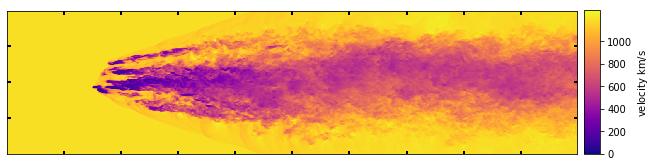

In [9]:
fig =plt.figure(figsize=(9,2.5), frameon=False)
ax =  fig.add_axes([0,0.1,0.88,0.8])
ax.set_xticks(2048*np.arange(0.1, 1, 0.1))
ax.set_yticks(512*np.arange(0.25, 1, 0.25))
ax.tick_params(axis='both', which='both', color='black', direction='in', labelleft=0, labelbottom=0, top=1, right=1,width=2)
vx_slice=vx_10[:,:,256]
plt.imshow(vx_slice.T,cmap='plasma',origin='lower')

cbaxes =  fig.add_axes([0.89, 0.1, 0.025, .8]) 

cb=plt.colorbar(orientation='vertical',cax = cbaxes, ticks=[np.arange(0,1200,200)])
cb.set_label(label='velocity $km/s$',size=10)


matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10) 

#ax.text(64, 420, r'$\tilde{n} = 0.5$ cloud ', color='black')
#ax.text(1800, 420, str(int(t_10/t_cc))+'$t_{cc}$', color='black')
#ax.text(1400, 75, r'2048x512x512 cells', color='black')


#plt.savefig(dnameout+'Slice_vx_newtemp_'+str(i10)+'.png', dpi=300)
#plt.close(fig)
plt.show()

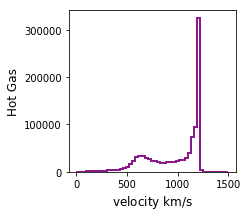

In [10]:
#Reshaping velocity slice to compute the percentage of gas that is moving at velocities that range between ~1000 km/s 
#to ~1,250 km/s
v_x=np.reshape(vx_slice, nx_10*ny_10)
xbins = np.linspace(0,1500,50)
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.19,0.17,0.58,0.75])
n10, bins, patches = ax.hist(v_x,xbins,histtype = 'step',alpha=0.9,linewidth=2.0, color = 'purple')
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
ax.set_xlabel('velocity $km/s$',fontsize=12)
ax.set_ylabel('Hot Gas',fontsize=12)
#plt.savefig(dnameout+'1DHistHotGas_'+str(i10)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [11]:
#Here I computed the total number of cells in the histogram above as well as the total number of cells that are within 
#the above velocity range. About 58.7 % of the hot gas is within ~1000 km/s to ~1,250 km/s.
cells_33_to_42=np.sum(n10[33:42])
total_cells_hist=np.sum(n10)
Cells_between_33_to_42=(cells_33_to_42/total_cells_hist)*100
print(Cells_between_33_to_42)

58.78568533485922


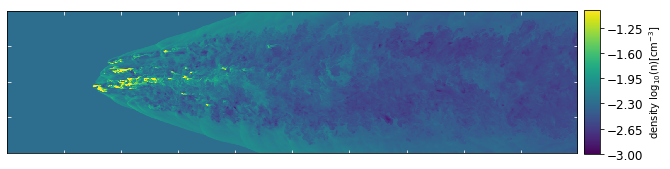

In [12]:
fig =plt.figure(figsize=(9,2.5), frameon=False)
ax = fig.add_axes([0,0.1,0.88,0.8])
ax.set_xticks(2048*np.arange(0.1, 1, 0.1))
ax.set_yticks(512*np.arange(0.25, 1, 0.25))
ax.tick_params(axis='both', which='both', color='white', direction='in', labelleft=0, labelbottom=0, top=1, right=1)
n_slice=log_n[:,:,256]
plt.imshow(n_slice.T,cmap='viridis',origin='lower',vmin=-3,vmax=-1)

cbaxes = fig.add_axes([0.89, 0.1, 0.025, .8]) 
cb=plt.colorbar(orientation='vertical',cax = cbaxes,ticks=[np.arange(-3,-1,0.35)])
plt.clim(-3,-1)
cb.set_label(label='density $log_{10}(n) [cm^{-3}]$',size=10)



matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10) 

#ax.text(64, 420, r'$\tilde{n} = 0.5$ cloud ', color='white')
#ax.text(1800, 420, str(int(t_10/t_cc))+'$t_{cc}$', color='white')
#ax.text(1400, 75, r'2048x512x512 cells', color='white')

#plt.savefig(dnameout+'Slice_n_newtemp_'+str(i10)+'.png', dpi=300)
#plt.close(fig)
plt.show()

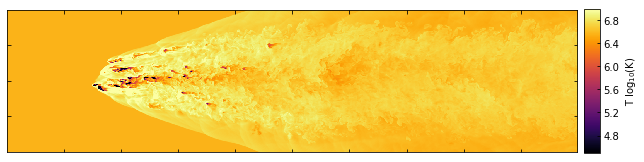

In [19]:
T = (GE_10*(gamma_10-1.0)*p_c)/(d*kb)
log_T = np.log10(T)

fig =plt.figure(figsize=(9,2.5), frameon=False)
ax = fig.add_axes([0,0.1,0.88,0.8])
ax.set_xticks(2048*np.arange(0.1, 1, 0.1))
ax.set_yticks(512*np.arange(0.25, 1, 0.25))
ax.tick_params(axis='both', which='both', color='black', direction='in', labelleft=0, labelbottom=0, top=1, right=1)
T_slice=log_T[:,:,256]
Tempcb=plt.imshow(T_slice.T,cmap='inferno',origin='lower',vmin=4.5,vmax=7)

cbaxes =  fig.add_axes([0.89, 0.1, 0.025, .8]) 
cb.set_label(label='T $log_{10}(K)$',size=10)
 
cb=plt.colorbar(orientation='vertical',cax = cbaxes,ticks=[np.arange(4,7,0.4)])
cb.set_label(label='T $log_{10}(K)$',size=10)
cbaxes.tick_params(axis='y', direction='in')

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10) 

#ax.text(64, 420, r'$\tilde{n} = 0.5$ cloud ', color='black')
#ax.text(1800, 420, str(int(t_10/t_cc))+'$t_{cc}$', color='black')
#ax.text(1400, 75, r'2048x512x512 cells', color='black')

#plt.savefig(dnameout+'Slice_Temp_newtemp_'+str(i10)+'.png', dpi=300)
#.close(fig)
plt.show()

In [14]:
# to create a projection, integrate the density array along one axis
den = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable)
n = den/(mu*mp)
pn_x = np.sum(n, axis=0)*dx*l_c
pn_y = np.sum(n, axis=1)*dx*l_c

In [15]:
# set the surface density scale
log_pn_x = np.log10(pn_x)
log_pn_y = np.log10(pn_y)
print("n range    = %e %e" % (np.min(n),np.max(n)))
print("N range    = %5.2f %5.2f" % (np.min(log_pn_x), np.max(log_pn_x)))
pn_min=17.5
pn_max=20.5

n range    = 5.868804e-04 5.532877e+02
N range    = 18.30 20.85


/Users/litadlc/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


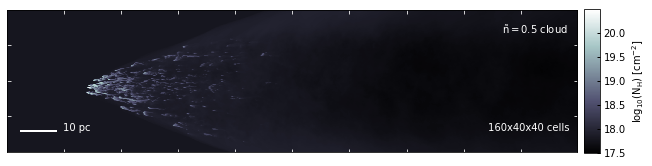

In [16]:
# plot the surface density, y-axis projection

fig =plt.figure(figsize=(9,2.5), frameon=False)
ax = fig.add_axes([0,0.1,0.88,0.8])
ax.set_xticks(2048*np.arange(0.1, 1, 0.1))
ax.set_yticks(512*np.arange(0.25, 1, 0.25))
ax.tick_params(axis='both', which='both', color='white', direction='in', labelleft=0, labelbottom=0, top=1, right=1)
T_slice=log_T[:,:,256]
image=plt.imshow(log_pn_y.T, origin='lower', cmap=plt.cm.bone, vmin=pn_min, vmax=pn_max)

cbaxes =  fig.add_axes([0.89, 0.1, 0.025, .8]) 
cb.set_label('$log_{10}(N_{H})$ [$cm^{-2}$]',size=10)
 

# add a colorbar
cbaxes = fig.add_axes([0.89, 0.1, 0.025, .8]) 
cb = plt.colorbar(image, cax = cbaxes, ticks=[np.arange(17.5, 20.5, 0.5)])
cbaxes.tick_params(axis='y', direction='in',width=1)
cb.solids.set_edgecolor('face')
cbaxes.set_ylabel('$log_{10}(N_{H})$ [$cm^{-2}$]',size=10)


ax.text(1775, 425, r'$\tilde{n} = 0.5$ cloud ', color='white')
ax.text(1725, 75, r'160x40x40 cells', color='white')
ax.text(200, 75, r'10 pc',color='white')
ax.plot([50, 175], [75,75], 'k-', lw=2, color= 'white')
plt.show()

#plt.savefig(dnameout+'sd_y_'+str(i10)+'.png', dpi=300)
#plt.close(fig)